In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Data loading:

In [4]:
data = pd.read_csv('uber.csv', low_memory=False, index_col=0)

In [5]:
data

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


# Data Preprocessing:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 24238194 to 11951496
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 13.7+ MB


In [7]:
data.dropna(inplace=True)

In [8]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


## IQR
$$IQR = Q_3 - Q_1$$
$$Min = Q_1 - 1.5 \times IQR$$
$$Max = Q_3 + 1.5 \times IQR$$

In [9]:
Q1 = data['pickup_longitude'].quantile(0.25)
Q3 = data['pickup_longitude'].quantile(0.75)
IQR = Q3 - Q1

Min = Q1 - 1.5 * IQR
Max = Q3 + 1.5 * IQR

In [10]:
data[(data['pickup_longitude']<Min) | (data['pickup_longitude']>Max)].shape[0]/data.shape[0]

0.06779533897669489

## Z score:

$$Z = |\frac{x - \mu}{\sigma}|$$

if Z > 3 then data is an outlier

In [11]:
mu = data['pickup_longitude'].mean()
std = data['pickup_longitude'].std()

Z = np.abs((data['pickup_longitude'] - mu)/std)

print(data[Z>3].shape[0]/data.shape[0]*100)

data = data[Z<=3]

1.9680098400492003


In [12]:
mu = data['pickup_latitude'].mean()
std = data['pickup_latitude'].std()

Z = np.abs((data['pickup_latitude'] - mu)/std)

print(data[Z>3].shape[0]/data.shape[0]*100)

data = data[Z<=3]

0.005100401401590305


In [11]:
mu = data['dropoff_latitude'].mean()
std = data['dropoff_latitude'].std()

Z = np.abs((data['dropoff_latitude'] - mu)/std)

print(data[Z>3].shape[0]/data.shape[0]*100)

data = data[Z<=3]

0.09028170953772705


In [13]:
mu = data['dropoff_longitude'].mean()
std = data['dropoff_longitude'].std()

Z = np.abs((data['dropoff_longitude'] - mu)/std)

print(data[Z>3].shape[0]/data.shape[0]*100)

data = data[Z<=3]

0.09640250340469159


In [14]:
data.reset_index(drop=True, inplace=True)

In [15]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,195864.000000,195864.000000,195864.000000,195864.000000,195864.000000,195864.000000
mean,11.341990,-73.975161,40.750899,-73.974158,40.752113,1.684888
std,9.798701,0.060226,0.032563,0.042952,1.048722,1.387724
min,-52.000000,-89.933333,39.514527,-75.458979,0.737003,0.000000
25%,6.000000,-73.992274,40.736447,-73.991597,40.735321,1.000000
50%,8.500000,-73.982108,40.753307,-73.980535,40.753746,1.000000
75%,12.500000,-73.968353,40.767550,-73.965373,40.768335,2.000000
max,499.000000,-67.370360,42.478467,-69.046738,493.533332,208.000000


# Feature extraction:

## [GeoPy](https://geopy.readthedocs.io/en/stable/)

In [15]:
! pip install geopy

In [24]:
from geopy.distance import geodesic

In [25]:
Distance = []

for i in range(data.shape[0]):
    start = (data.loc[i, 'pickup_latitude'], data.loc[i, 'pickup_longitude'])
    dest = (data.loc[i, 'dropoff_latitude'], data.loc[i, 'dropoff_longitude'])
    Distance.append(geodesic(start, dest).kilometers)

ValueError: Latitude must be in the [-90; 90] range.

In [19]:
df = pd.DataFrame({'distance': Distance,
                   'n_passenger': data['passenger_count'].values,
                   'fare': data['fare_amount'].values})

ValueError: All arrays must be of the same length

In [21]:
df

NameError: name 'df' is not defined

In [22]:
df.describe()

NameError: name 'df' is not defined

In [23]:
df = df[df['distance']!=0]
df = df[df['n_passenger']!=0]
df = df[df['n_passenger']<=6]
df = df[df['fare']>0]

df.reset_index(inplace=True, drop=True)

NameError: name 'df' is not defined

In [22]:
mu = df['fare'].mean()
std = df['fare'].std()

Z = np.abs((df['fare'] - mu)/std)

print(df[Z>3].shape[0]/df.shape[0]*100)

df = df[Z<=3]

2.713983149587543


In [23]:
mu = df['distance'].mean()
std = df['distance'].std()

Z = np.abs((df['distance'] - mu)/std)

print(df[Z>3].shape[0]/df.shape[0]*100)

df = df[Z<=3]

0.14424868259967


In [24]:
df.reset_index(inplace=True, drop=True)

<AxesSubplot: xlabel='distance', ylabel='fare'>

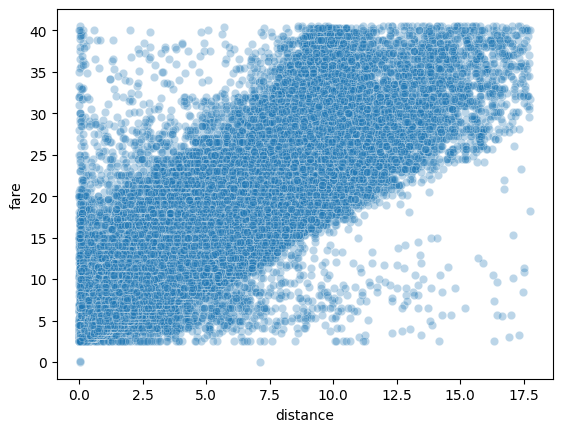

In [25]:
sns.scatterplot(x='distance', y='fare', data=df, alpha=0.3)

# Linear Model:

$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n,$$
$$\theta = (X^T X)^{-1} X^T Y$$

In [28]:
from sklearn.model_selection import train_test_split

In [36]:
X = np.asarray(df[['distance', 'n_passenger']])
y = np.asarray(df['fare'])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.35)

In [38]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(121939, 2) (121939,)
(65660, 2) (65660,)


In [57]:
theta1 = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [58]:
theta1

array([2.59795198, 0.93668991])

In [61]:
X_test @ theta1

array([14.42344649,  4.55770326,  8.01301004, ...,  5.38475581,
        8.16205292,  8.37304835])

In [45]:
xx = np.c_[np.ones((X_train.shape[0])), X_train]

In [47]:
theta2 = np.linalg.inv(xx.T @ xx) @ xx.T @ y_train

In [48]:
theta2

array([3.64972518, 2.18296134, 0.03947529])

In [66]:
np.c_[np.ones((X_test.shape[0])), X_test] @ theta2

array([13.52643477,  6.73180181,  8.88757613, ...,  6.67915294,
        9.01281126,  9.93769279])

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr1 = LinearRegression()

lr1.fit(X_train, y_train)

LinearRegression()

In [51]:
lr1.coef_

array([2.18296134, 0.03947529])

In [52]:
lr1.intercept_

3.649725180583724

In [53]:
theta2

array([3.64972518, 2.18296134, 0.03947529])

In [62]:
y_pred = lr1.predict(X_test)

In [63]:
y_pred

array([13.52643477,  6.73180181,  8.88757613, ...,  6.67915294,
        9.01281126,  9.93769279])

In [64]:
y_test

array([12.1,  7.3,  9.3, ...,  4.9,  9.5,  9.7])

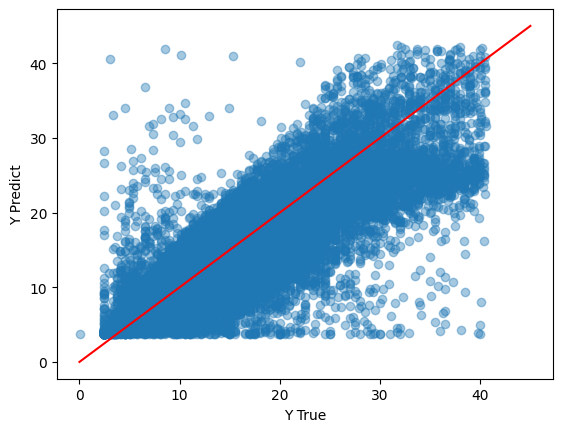

In [71]:
plt.scatter(y_test, y_pred, alpha=0.4);
plt.plot(np.linspace(0, 45, 100), 
         np.linspace(0, 45, 100),
         c='red')

plt.xlabel('Y True')
plt.ylabel('Y Predict');

In [54]:
lr2 = LinearRegression(fit_intercept=False)
lr2.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [55]:
lr2.coef_

array([2.59795198, 0.93668991])

In [56]:
theta

array([2.59795198, 0.93668991])

In [72]:
y_pred = lr2.predict(X_test)

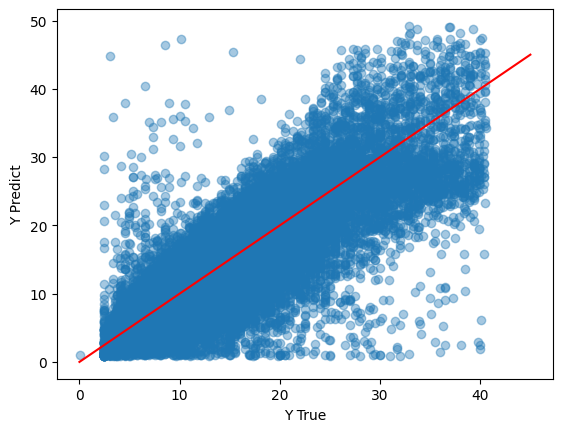

In [73]:
plt.scatter(y_test, y_pred, alpha=0.4);
plt.plot(np.linspace(0, 45, 100), 
         np.linspace(0, 45, 100),
         c='red')

plt.xlabel('Y True')
plt.ylabel('Y Predict');

#  Metrics:

$$Max ERR = \max_i |y_i - \hat{y}_i|,$$

$$MAE = \frac{1}{n_{sample}} \sum_{i=1}^{n_{sample}} |y_i - \hat{y}_i|$$

$$MSE = \frac{1}{n_{sample}} \sum_{i=1}^{n_{sample}} (y_i - \hat{y}_i)^2$$

$$RMSE = \sqrt{\frac{1}{n_{sample}} \sum_{i=1}^{n_{sample}} (y_i - \hat{y}_i)^2}$$

$$R^2 = 1 - \frac{ \sum_{i=1}^{n_{sample}} (y_i - \hat{y}_i)^2}{ \sum_{i=1}^{n_{sample}} (y_i - \bar{y})^2}$$

In [80]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [75]:
max_error(y_true=y_test, y_pred=y_pred)

41.875281821009004

In [77]:
mean_absolute_error(y_true=y_test, y_pred=y_pred)

2.48529856943759

In [78]:
mean_squared_error(y_true=y_test, y_pred=y_pred)

12.83761589289137

In [79]:
root_mean_squared_error(y_true=y_test, y_pred=y_pred)

3.582961888283403

In [81]:
r2_score(y_true=y_test, y_pred=y_pred)

0.6836944897986325

## Polynomial Features

In [1]:
from sklearn.preprocessing import PolynomialFeatures

ModuleNotFoundError: No module named 'sklearn'

## Linear Ridge:
$$\min_{\omega} \| X\theta - y\|_2^2 + \alpha \|\theta\|^2_2$$

## Linear Lasso:
$$\min_{\omega} \frac{1}{n_{sample}}\| X\theta - y\|_2^2 + \alpha \|\theta\|_1$$

## Elastic-Net Model
$$\min_{\theta} \frac{1}{2 n_{Samples}} \|X\theta - y\|^2_2 + \alpha \rho\|\theta\|_1 + \frac{\alpha(1-\rho)}{2}\|\theta\|_2^2, ~~~~0\leq \rho \leq 1$$